# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset selected contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> We will explore the dataset to answer the below questions.  
- Which genres are most popular from year to year? 
- What kinds of properties are associated with movies that have high revenues?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

> Load the data and print out a few lines. Perform operations to inspect data types and look for instances of missing or possibly errant data.

In [2]:
tmdb_raw_df = pd.read_csv('./data/tmdb-movies.csv')
tmdb_raw_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
tmdb_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> Check for duplicates and print the rows

In [4]:
tmdb_raw_df[tmdb_raw_df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


> Check for the total nuber of null values in all the columns and print the rows if there are any nulls in critical columns.

In [5]:
tmdb_raw_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
tmdb_raw_df[tmdb_raw_df['imdb_id'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,468.016676,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000,0.0


In [7]:
tmdb_raw_df[tmdb_raw_df['genres'].isnull()].head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.0,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.0,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.0,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.0,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.0,0.0


> Show statistics to see if there are any zeroes in the columns.

In [8]:
tmdb_raw_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

> Considering the above inspection, we need to perform these steps:
- Remove the duplicate row.
- Remove the 10 rows where imdb_id is null since it's a significant column required to identify unique records.
- Remove the 23 rows where genres is null since it's one of the columns required for further analysis and store into tmdb_genre_df.
- Remove all the rows having 0's in the runtime,budget_adj and revenue_adj columns and store into tmdb_revenue_df.

In [9]:
tmdb_df = tmdb_raw_df.copy(deep=True)
tmdb_df.drop_duplicates(inplace=True)
tmdb_df.dropna(subset=['imdb_id'], inplace=True)
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

In [10]:
tmdb_genre_df = tmdb_df.dropna(subset=['genres'])
tmdb_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 21 columns):
id                      10834 non-null int64
imdb_id                 10834 non-null object
popularity              10834 non-null float64
budget                  10834 non-null int64
revenue                 10834 non-null int64
original_title          10834 non-null object
cast                    10759 non-null object
homepage                2929 non-null object
director                10795 non-null object
tagline                 8033 non-null object
keywords                9363 non-null object
overview                10832 non-null object
runtime                 10834 non-null int64
genres                  10834 non-null object
production_companies    9822 non-null object
release_date            10834 non-null object
vote_count              10834 non-null int64
vote_average            10834 non-null float64
release_year            10834 non-null int64
budget_adj              1

In [11]:
tmdb_revenue_df = tmdb_df.replace(0,np.nan)
tmdb_revenue_df.dropna(subset=['runtime','budget_adj','revenue_adj'], inplace=True)
tmdb_revenue_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1

> Which genres are most popular from year to year?

> To answer this we will perform the below steps:
- Take the cleaned data and split them into three sub tables having genres, popularity and release_year with imdb_id as the index.
- Merge them after further processing and plot the data for visualization.

> - Create a dataframe with imdb_id as index and genres as a column.
- Expand the dataframe by taking the strings inside genres and setting them as individual columns.

In [12]:
genre_raw_df = tmdb_genre_df[['imdb_id','genres']].copy()
genre_raw_df.set_index('imdb_id',inplace='True')
genre_df = genre_raw_df['genres'].str.get_dummies(sep='|')
genre_df.sort_index(inplace='True')
genre_df.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
imdb_id,,,,,,,,,,,,,,,,,,,,
tt0035423,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
tt0052646,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
tt0053559,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
tt0053580,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
tt0053604,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


> Create a dataframe with imdb_id as index and popularity as a column and visualize the data.

In [13]:
popularity_df = tmdb_genre_df[['imdb_id','popularity']].copy()
popularity_df.set_index('imdb_id',inplace='True')
popularity_df.sort_index(inplace='True')
popularity_df.head()

,popularity
imdb_id,
tt0035423,0.883228
tt0052646,0.215748
tt0053559,0.110511
tt0053580,0.310398
tt0053604,0.947307


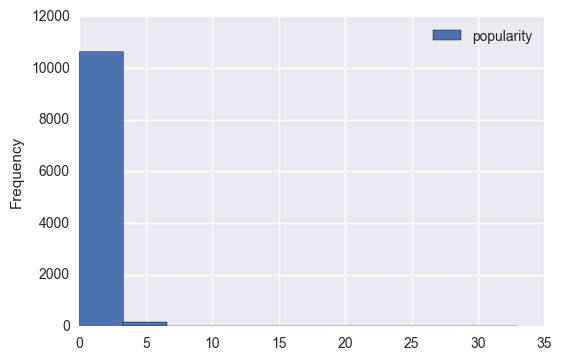

In [14]:
popularity_df.plot.hist()

> Create a dataframe with imdb_id as index and release_year as a column and visualize the data.

In [15]:
release_year_df = tmdb_genre_df[['imdb_id','release_year']].copy()
release_year_df.set_index('imdb_id',inplace='True')
release_year_df.sort_index(inplace='True')
release_year_df.head()

,release_year
imdb_id,
tt0035423,2001
tt0052646,1962
tt0053559,1960
tt0053580,1960
tt0053604,1960


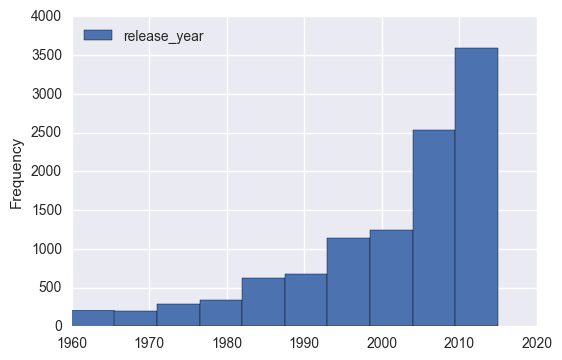

In [16]:
release_year_df.plot.hist()

> Create a dataframe by multiplying the genre table with the popularity table.

In [17]:
popularity_genre_df = genre_df.mul(popularity_df['popularity'], axis=0)
popularity_genre_df.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
imdb_id,,,,,,,,,,,,,,,,,,,,
tt0035423,0.000000,0.000000,0.0,0.883228,0.0,0.0,0.000000,0.0,0.883228,0.0,0.000000,0.000000,0.0,0.0,0.883228,0.883228,0.0,0.0,0.0,0.000000
tt0052646,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.215748,0.0,0.0,0.000000,0.215748,0.0,0.0,0.0,0.000000
tt0053559,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.110511,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
tt0053580,0.310398,0.310398,0.0,0.000000,0.0,0.0,0.310398,0.0,0.000000,0.0,0.310398,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.310398
tt0053604,0.000000,0.000000,0.0,0.947307,0.0,0.0,0.947307,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.947307,0.000000,0.0,0.0,0.0,0.000000


> - Merge the product table with the release_year table.
- Group the dataframe on the release_year by taking average of each genre.
- Plot the popular genres against the year of release.

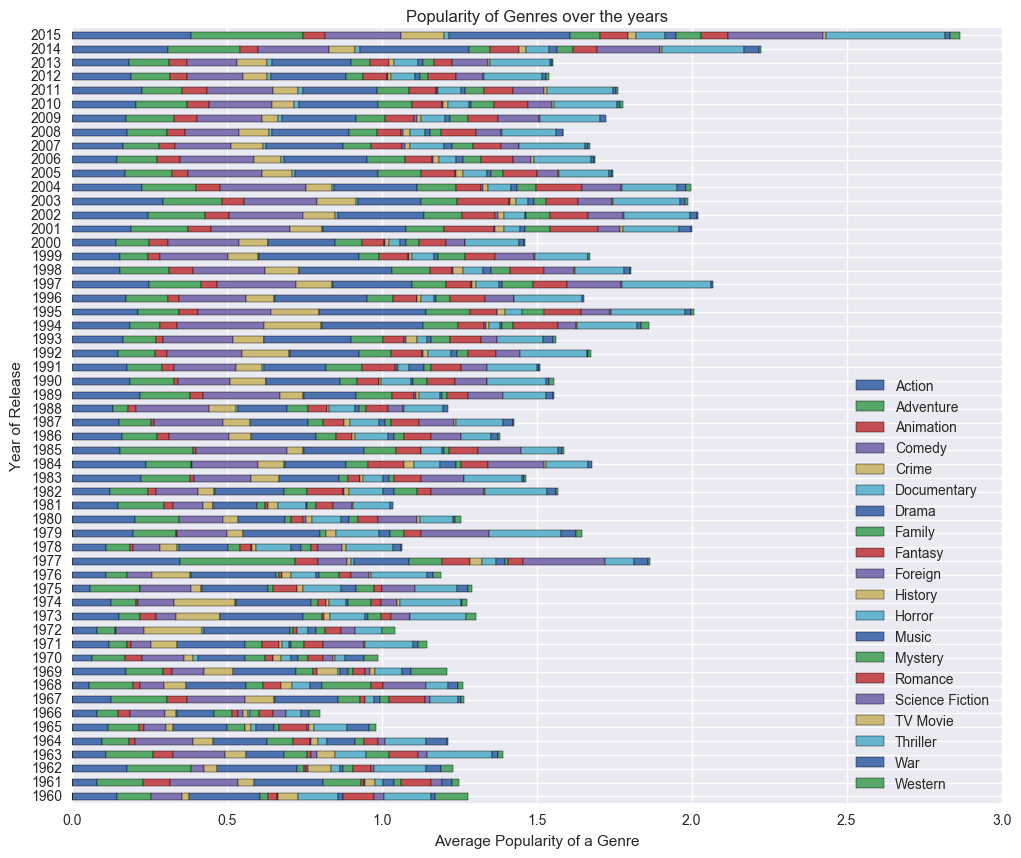

In [18]:
pop_gen_year_df = popularity_genre_df.merge(release_year_df,left_index=True,right_index=True)
pop_gen_year_grp = pop_gen_year_df.groupby('release_year').mean()
pop_gen_year_grp.plot.barh(stacked=True,figsize=(12, 10),title='Popularity of Genres over the years')
plt.xlabel('Average Popularity of a Genre')
plt.ylabel('Year of Release')

### Summary: 

- Looking at the graph above, although the overall popularity seems to be rising for the movies in recent years, the proportion of each genre within the individual years seem to be similar.
- The most popular genres among the genres seem to be Action, Adventure, Comedy, Drama, Sci-Fi and Thriller.

### Research Question 2

> What kinds of properties are associated with movies that have high revenues?

> To answer this we will perform the below steps:
- Take a subset of top 100 movies with the highest revenue.
- Generate plots to visualize the below:
    - revenue_adj vs popularity
    - revenue_adj vs runtime
    - revenue_adj vs vote_count
    - revenue_adj vs vote_average
    - revenue_adj vs release_year
    - revenue_adj vs budget_adj

In [19]:
def dataframe_plot(dataframe,x_axis,y_axis):
    dataframe.plot.scatter(x=x_axis,y=y_axis,figsize=(6, 2))

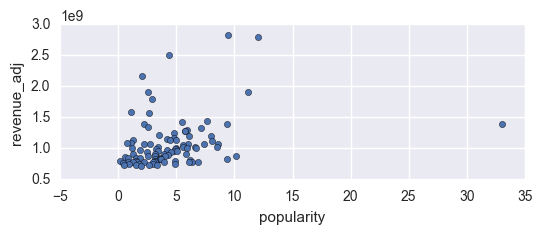

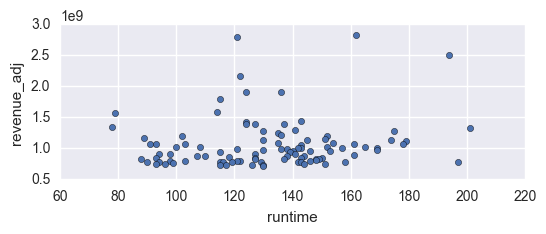

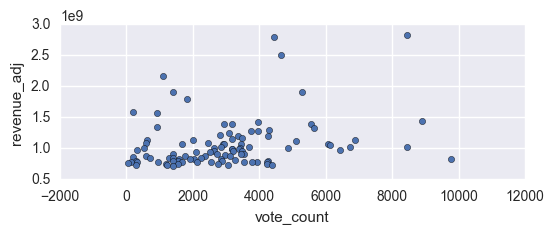

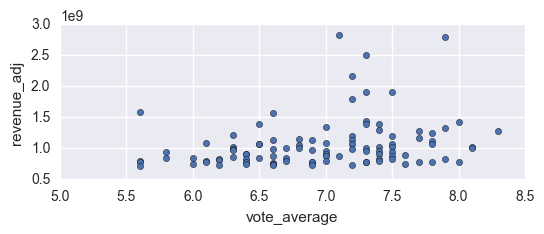

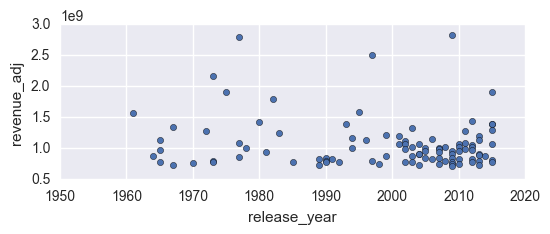

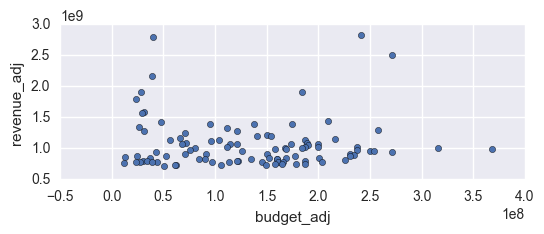

In [20]:
revenue_df = tmdb_revenue_df.nlargest(100,'revenue_adj')
columns = ['popularity','runtime','vote_count','vote_average','release_year','budget_adj']

for column in columns:
    dataframe_plot(revenue_df,column,'revenue_adj')

In [21]:
tmdb_revenue_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


### Summary: 

- The average popularity for the population is 1.2 and the popularity for top grossing films seem to concentrate in the range of 0 to 10.
- The average runtime for the population is 109.2 and the runtime for the top grossing films seem to concentrate in the range of 80 to 180.
- The average vote_count for the population is 527.7 and the vote_count for the top grossing films seem to concentrate in the range of 0 to 6000.
- The average vote_average for the population is 6.2 and the vote_average for the top grossing films seem to concentrate in the range of 6 to 8.
- The average release_year for the population is 2001 and the release_year for the top grossing films seem to concentrate in the range of 1990 to 2015.
- The average budget_adj for the population is 44.2M and the budget_adj for the top grossing films seem to concentrate in the range of 100M to 2.5B. <br>Where M is millions and B is billions.</br>

<a id='conclusions'></a>
## Conclusions

> We have seen the summaries for each question, however we need to keep the below limiations in mind before we draw any results:
- We need to take into consideration that this was just an exploratory analysis.
- It has its limitations as there were no statistical tests performed.
- Hence we cannot imply anything conclusively as it could be causation from correlation.